In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import math
from scipy.stats import ttest_1samp

results_path = "/hpc/home/mk423/Anxiety/FullDataWork/Validations/SingleTask/"

plots_path = "/hpc/home/mk423/Anxiety/FullDataWork/Figures/SingleTask/"


def mean_sterr_auc_3n(auc_dict):
    temp = []
    temp_2 = []
    temp_3 = []
    n_samps = 0
    for i, key in enumerate(auc_dict.keys()):
        if ~np.isnan(auc_dict[key][0]):            
            temp.append(auc_dict[key][0])
            temp_2.append(auc_dict[key][1])
            temp_3.append(auc_dict[key][2])
            
    mean = np.mean(temp)
    stderr = np.std(temp) / np.sqrt(len(temp))
    
    mean_2 = np.mean(temp_2)
    stderr_2 = np.std(temp_2) / np.sqrt(len(temp_2))
    
    mean_3 = np.mean(temp_3)
    stderr_3 = np.std(temp_3) / np.sqrt(len(temp_3))
    
    return mean, stderr, mean_2, stderr_2, mean_3, stderr_3, len(temp)

def mean_sterr_auc(auc_dict):
    temp = []
    n_samps = 0
    for i, key in enumerate(auc_dict.keys()):
        if ~np.isnan(auc_dict[key][0]):            
            temp.append(auc_dict[key])
    mean = np.mean(temp)
    stderr = np.std(temp) / np.sqrt(len(temp))
    return mean, stderr, len(temp)

## EPM

In [6]:
epm_results_file = results_path + "epm_singleTask_30_net_fold_{}_results.pkl"
epm_plots_file = plots_path + "epm_singleTask_{}_net_fold_{}_electome.png"

fold_list = [1,2,3,4]

flx_auc_list = []
epm_auc_list = []
oft_auc_list = []

flx_sterr_list = []
epm_sterr_list = []
oft_sterr_list = []

flx_points_list = []
epm_points_list = []
oft_points_list = []

flx_mouse_list = []
epm_mouse_list = []
oft_mouse_list = []

for fold in fold_list:
    
    resultsDict = pickle.load(open(epm_results_file.format(fold),"rb"))
    print("Fold ",fold)
    
    flx_val_auc_dict = resultsDict['flx_val_auc']
    flx_train_auc_dict = resultsDict['flx_train_auc']
    flx_val_auc_dict.update(flx_train_auc_dict)
    flx_auc_dict = flx_val_auc_dict
    
    flx_mean, flx_sterr, flx_n = mean_sterr_auc(flx_auc_dict)
    print("FLX (mean, stderr, n)",flx_mean, flx_sterr, flx_n)
    flx_auc_list.append(flx_mean)
    flx_sterr_list.append(flx_sterr)
    flx_points_list.append([flx_auc_dict[key] for key in flx_auc_dict.keys()])
    flx_mouse_list.append([key for key in flx_auc_dict.keys()])
    
    epm_val_auc_dict = resultsDict['epm_val_auc']
    epm_train_auc_dict = resultsDict['epm_train_auc']
    epm_auc_dict = epm_val_auc_dict
    
    epm_mean, epm_sterr, epm_n = mean_sterr_auc(epm_auc_dict)
    print("EPM (mean, stderr, n)",epm_mean, epm_sterr, epm_n)
    epm_auc_list.append(epm_mean)
    epm_sterr_list.append(epm_sterr)
    epm_points_list.append([epm_auc_dict[key] for key in epm_auc_dict.keys()])
    epm_mouse_list.append([key for key in epm_auc_dict.keys()])
    
    oft_val_auc_dict = resultsDict['oft_val_auc']
    oft_train_auc_dict = resultsDict['oft_train_auc']
    oft_val_auc_dict.update(oft_train_auc_dict)
    oft_auc_dict = oft_val_auc_dict
    
    oft_mean, oft_sterr, oft_n = mean_sterr_auc(oft_auc_dict)
    print("OFT (mean, stderr, n)",oft_mean, oft_sterr, oft_n)
    oft_auc_list.append(oft_mean)
    oft_sterr_list.append(oft_sterr)
    oft_points_list.append([oft_auc_dict[key] for key in oft_auc_dict.keys()])
    oft_mouse_list.append([key for key in oft_auc_dict.keys()])

Fold  1
FLX (mean, stderr, n) 0.4867481489858728 0.045621107052957376 9
EPM (mean, stderr, n) 0.7485575498264465 0.031774988750295184 7
OFT (mean, stderr, n) 0.7845193649605143 0.0319924876096872 15
Fold  2
FLX (mean, stderr, n) 0.4992594290381944 0.04364191209083526 9
EPM (mean, stderr, n) 0.7207512415644372 0.02017393983407413 7
OFT (mean, stderr, n) 0.7713115507066258 0.03204560816521396 15
Fold  3
FLX (mean, stderr, n) 0.48869045171914877 0.04580714507150569 9
EPM (mean, stderr, n) 0.741659701509052 0.028753093400442093 6
OFT (mean, stderr, n) 0.766374496295645 0.037035832986124825 15
Fold  4
FLX (mean, stderr, n) 0.51015501882338 0.04413006824252926 9
EPM (mean, stderr, n) 0.7605788772582407 0.03876661917047886 5
OFT (mean, stderr, n) 0.7828125098437785 0.033701865943379525 15


In [13]:
flx_auc

array([0.61873723, 0.38444138, 0.51891868, 0.83683498, 0.41327813,
              nan, 0.48893988, 0.43336627, 0.44993986, 0.44693877,
              nan,        nan,        nan])

In [17]:
test_df_list = []
for fold in range(4):
    oft_auc = np.array(oft_points_list[fold]).squeeze()
    oft_mice = np.array(oft_mouse_list[fold]).squeeze()
    
    flx_auc = np.array(flx_points_list[fold]).squeeze()
    flx_mice = np.array(flx_mouse_list[fold]).squeeze()
    
    epm_auc = np.array(epm_points_list[fold]).squeeze()
    epm_mice = np.array(epm_mouse_list[fold]).squeeze()
    
    temp_oft = pd.DataFrame({"oft-mouse-fold-{}".format(fold):oft_mice,
                             "oft-auc-fold-{}".format(fold):oft_auc})
    
    temp_flx = pd.DataFrame({"flx-mouse-fold-{}".format(fold):flx_mice,
                             "flx-auc-fold-{}".format(fold):flx_auc})
    
    temp_epm = pd.DataFrame({"epm-mouse-fold-{}".format(fold):epm_mice,
                             "epm-auc-fold-{}".format(fold):epm_auc})
    
    
    df_con =  pd.concat([temp_flx,temp_epm,temp_oft],axis=1)
    
    test_df_list.append(df_con)
    
test_df = pd.concat(test_df_list,axis=1)
test_df.to_csv("EPM_SingleTask_kf_results.csv")
test_df.head()

,flx-mouse-fold-0,flx-auc-fold-0,epm-mouse-fold-0,epm-auc-fold-0,oft-mouse-fold-0,oft-auc-fold-0,flx-mouse-fold-1,flx-auc-fold-1,epm-mouse-fold-1,epm-auc-fold-1,...,epm-mouse-fold-2,epm-auc-fold-2,oft-mouse-fold-2,oft-auc-fold-2,flx-mouse-fold-3,flx-auc-fold-3,epm-mouse-fold-3,epm-auc-fold-3,oft-mouse-fold-3,oft-auc-fold-3
0,Mouse3191,0.561680,Mouse04193,0.681760,Mouse04193,0.840473,Mouse3191,0.639907,Mouse04205,0.682716,...,Mouse39125,0.853737,Mouse3191,0.484787,Mouse3191,0.618737,Mouse69065,0.863508,Mouse04191,0.771449
1,Mouse3193,0.384335,Mouse04201,0.842690,Mouse04201,0.836711,Mouse3193,0.383233,Mouse0643,0.763814,...,Mouse39133,0.805959,Mouse3193,0.607035,Mouse3193,0.384441,Mouse69074,0.709369,Mouse3191,0.459820
2,Mouse61631,0.415790,Mouse04202,0.837707,Mouse04202,0.839755,Mouse61635,0.412578,Mouse1551,0.632789,...,Mouse6293,0.718540,Mouse39125,0.884827,Mouse78752,0.518919,Mouse8582,0.779762,Mouse3193,0.632859
3,Mouse3192,0.838811,Mouse0630,0.704309,Mouse3191,0.457661,Mouse3192,0.810516,Mouse39114,0.687451,...,Mouse69064,0.744641,Mouse39133,0.710483,Mouse3192,0.836835,Mouse8891,0.621511,Mouse69065,0.714174
4,Mouse3194,0.350933,Mouse0633,0.798779,Mouse3193,0.614095,Mouse3194,0.413096,Mouse39124,0.784365,...,Mouse8580,0.650926,Mouse69064,0.579536,Mouse3194,0.413278,Mouse8894,0.828745,Mouse69074,0.744482


In [14]:
temp_oft

,oft-mouse-fold-3,oft-auc-fold-3
0,Mouse04191,0.771449
1,Mouse3191,0.459820
2,Mouse3193,0.632859
3,Mouse69065,0.714174
4,Mouse69074,0.744482
5,Mouse04193,0.873209
6,Mouse04201,0.931108
7,Mouse04202,0.895988
8,Mouse04205,0.964515
9,Mouse04215,NaN


In [30]:
epm_mice

['Mouse69065', 'Mouse69074', 'Mouse8582', 'Mouse8891', 'Mouse8894']

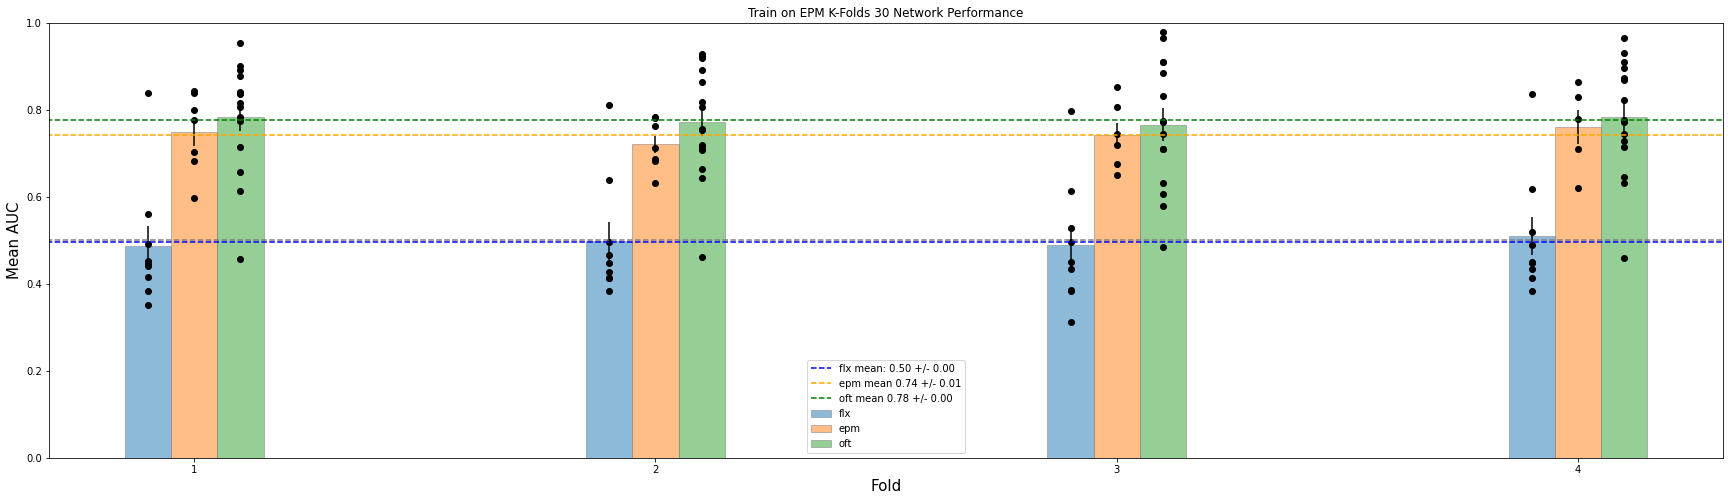

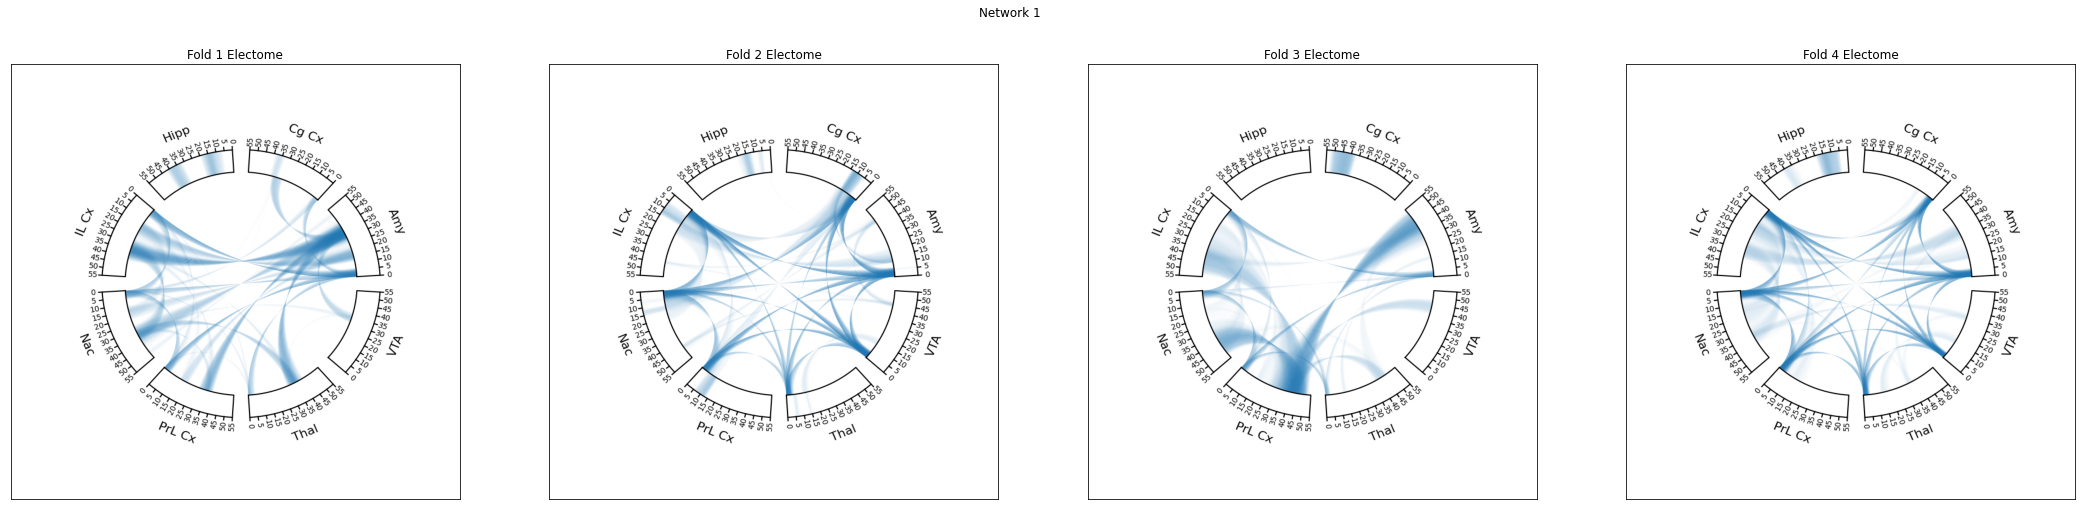

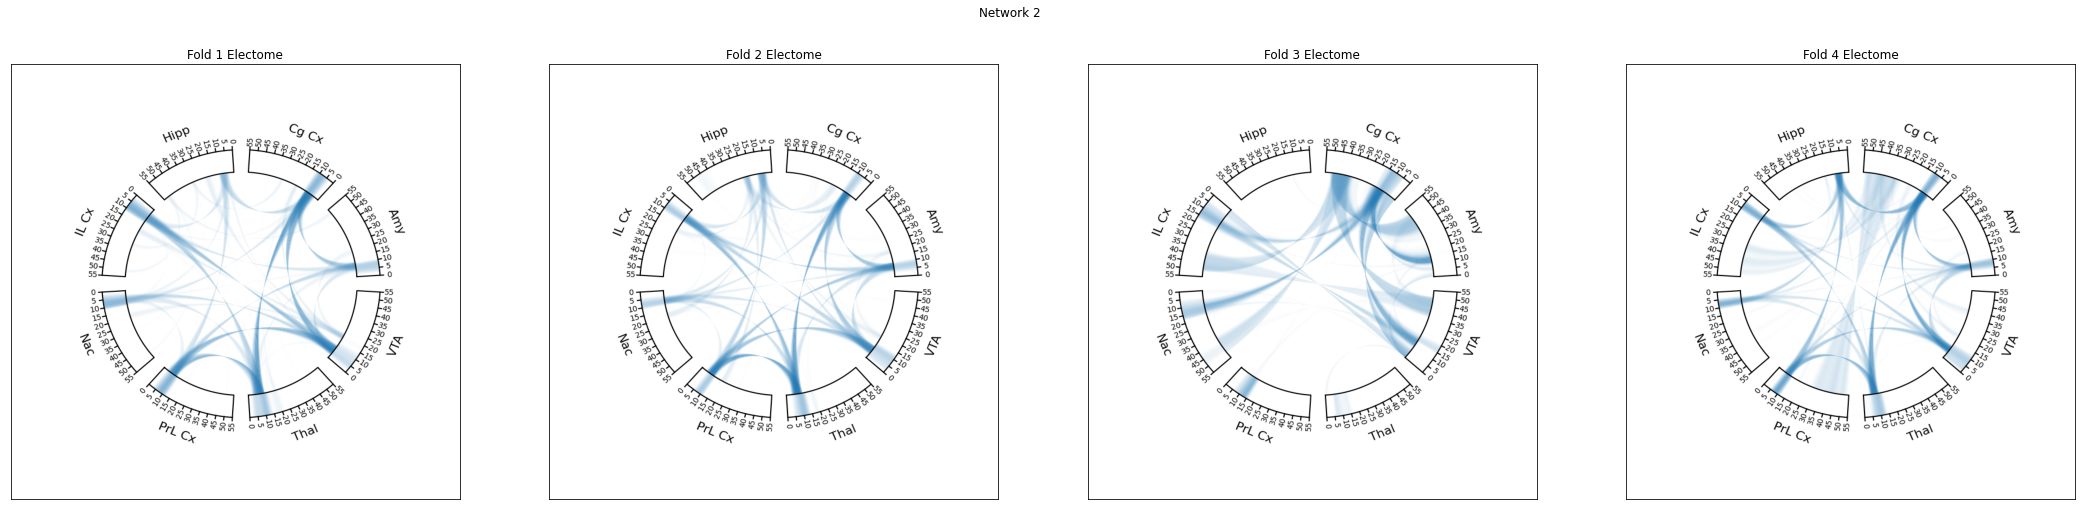

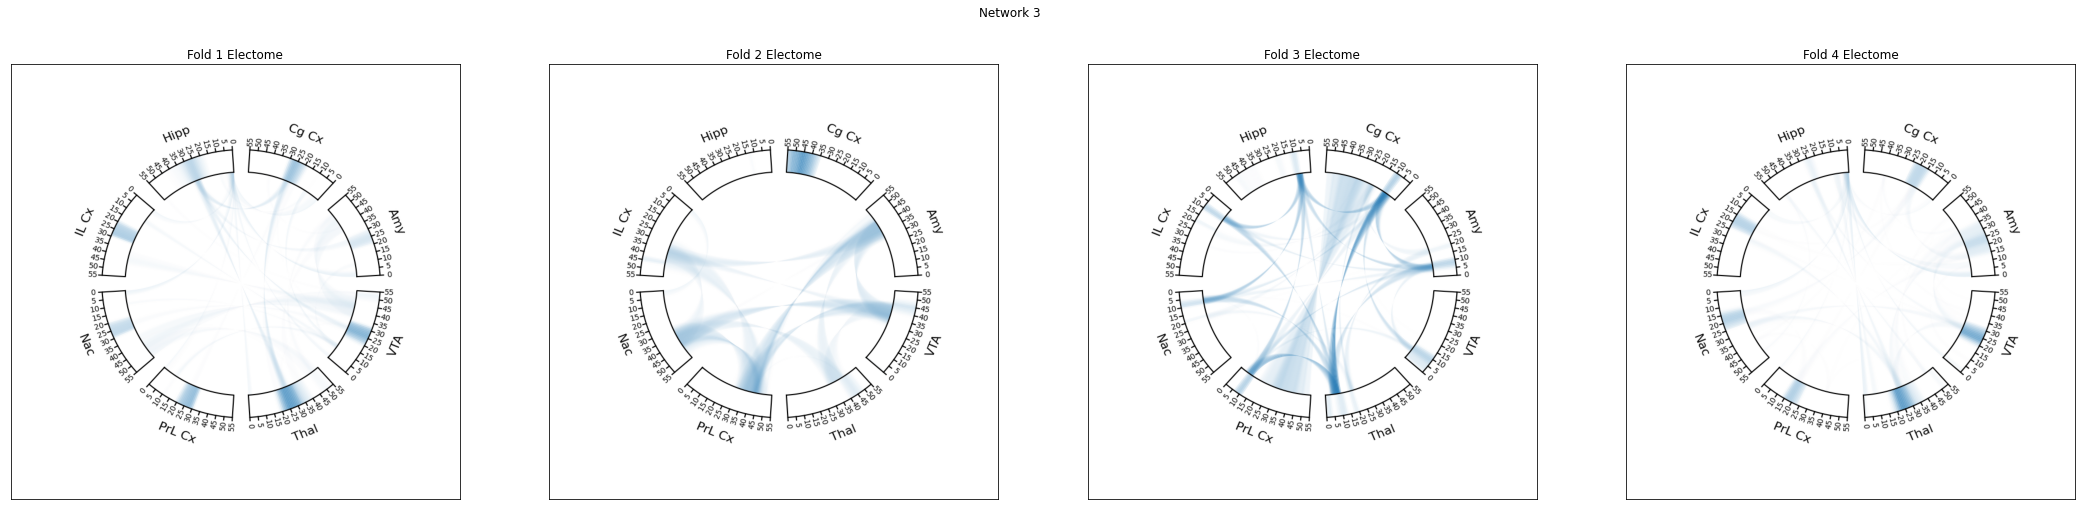

In [3]:
barWidth = 0.1
fig = plt.subplots(figsize=(30,8))

br1 = np.arange(len(flx_auc_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, flx_auc_list,yerr=flx_sterr_list, width = barWidth,
        edgecolor ='grey', label ='flx',alpha=0.5)
plt.bar(br2, epm_auc_list,yerr=epm_sterr_list, width = barWidth,
        edgecolor ='grey', label ='epm',alpha=0.5)
plt.bar(br3, oft_auc_list,yerr=oft_sterr_list, width = barWidth,
        edgecolor ='grey', label ='oft',alpha=0.5)

for fold in range(len(fold_list)):
    plt.scatter(np.ones(len(flx_points_list[fold]))*br1[fold],flx_points_list[fold],color="black")
    plt.scatter(np.ones(len(epm_points_list[fold]))*br2[fold],epm_points_list[fold],color="black")
    plt.scatter(np.ones(len(oft_points_list[fold]))*br3[fold],oft_points_list[fold],color="black")

# Adding Xticks
plt.axhline(0.5,-1,6,linestyle="dashed",color="grey")
plt.axhline(np.mean(flx_auc_list),-1,6,linestyle="dashed",color="blue",label="flx mean: {:.2f} +/- {:.2f}".format(np.mean(flx_auc_list),np.std(flx_auc_list)/np.sqrt(len(flx_auc_list))))
plt.axhline(np.mean(epm_auc_list),-1,6,linestyle="dashed",color="orange",label="epm mean {:.2f} +/- {:.2f}".format(np.mean(epm_auc_list),np.std(epm_auc_list)/np.sqrt(len(epm_auc_list))))
plt.axhline(np.mean(oft_auc_list),-1,6,linestyle="dashed",color="green",label="oft mean {:.2f} +/- {:.2f}".format(np.mean(oft_auc_list),np.std(oft_auc_list)/np.sqrt(len(oft_auc_list))))
plt.xlabel('Fold', fontsize = 15)
plt.ylabel('Mean AUC', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(flx_auc_list))],
        fold_list)
plt.ylim([0,1])
plt.legend(prop={'size':10})
plt.title("Train on EPM K-Folds 30 Network Performance")
plt.savefig("/hpc/home/mk423/Anxiety/FullDataWork/Figures/SingleTask/EPM_K_Folds_Prediction.svg")
plt.show()

for net in [1,2,3]:
    plt.figure(figsize=(37,8))
    
    for i,fold in enumerate(fold_list):
        plt.subplot(1,4,i+1)
        im = image.imread(epm_plots_file.format(net,fold))
        plt.imshow(im,aspect="auto")
        plt.title("Fold {} Electome".format(fold))
        plt.xticks([])
        plt.yticks([])
    plt.suptitle("Network {}".format(net))
    plt.show()

In [7]:
np.array(flx_points_list).shape

(4, 13, 1)

In [9]:
np.array(oft_points_list).shape

(4, 19, 1)

## OFT

In [18]:
epm_results_file = results_path + "oft_singleTask_30_net_fold_{}_results.pkl"
epm_plots_file = plots_path + "oft_singleTask_{}_net_fold_{}_electome.png"

fold_list = [1,2,3,4]

flx_auc_list = []
epm_auc_list = []
oft_auc_list = []

flx_sterr_list = []
epm_sterr_list = []
oft_sterr_list = []

flx_points_list = []
epm_points_list = []
oft_points_list = []

flx_mouse_list = []
epm_mouse_list = []
oft_mouse_list = []
for fold in fold_list:
    
    resultsDict = pickle.load(open(epm_results_file.format(fold),"rb"))
    print("Fold ",fold)
    
    flx_val_auc_dict = resultsDict['flx_val_auc']
    flx_train_auc_dict = resultsDict['flx_train_auc']
    flx_val_auc_dict.update(flx_train_auc_dict)
    flx_auc_dict = flx_val_auc_dict
    
    flx_mean, flx_sterr, flx_n = mean_sterr_auc(flx_auc_dict)
    print("FLX (mean, stderr, n)",flx_mean, flx_sterr, flx_n)
    flx_auc_list.append(flx_mean)
    flx_sterr_list.append(flx_sterr)
    flx_points_list.append([flx_auc_dict[key] for key in flx_auc_dict.keys()])
    flx_mouse_list.append([key for key in flx_auc_dict.keys()])

    epm_val_auc_dict = resultsDict['epm_val_auc']
    epm_train_auc_dict = resultsDict['epm_train_auc']
    epm_val_auc_dict.update(epm_train_auc_dict)
    epm_auc_dict = epm_val_auc_dict
    
    epm_mean, epm_sterr, epm_n = mean_sterr_auc(epm_auc_dict)
    print("EPM (mean, stderr, n)",epm_mean, epm_sterr, epm_n)
    epm_auc_list.append(epm_mean)
    epm_sterr_list.append(epm_sterr)
    epm_points_list.append([epm_auc_dict[key] for key in epm_auc_dict.keys()])
    epm_mouse_list.append([key for key in epm_auc_dict.keys()])

    oft_val_auc_dict = resultsDict['oft_val_auc']
    oft_train_auc_dict = resultsDict['oft_train_auc']
    oft_auc_dict = oft_val_auc_dict
    
    oft_mean, oft_sterr, oft_n = mean_sterr_auc(oft_auc_dict)
    print("OFT (mean, stderr, n)",oft_mean, oft_sterr, oft_n)
    oft_auc_list.append(oft_mean)
    oft_sterr_list.append(oft_sterr)
    oft_points_list.append([oft_auc_dict[key] for key in oft_auc_dict.keys()])
    oft_mouse_list.append([key for key in oft_auc_dict.keys()])


Fold  1
FLX (mean, stderr, n) 0.478803717402952 0.036986708578840156 9
EPM (mean, stderr, n) 0.6540302982422571 0.020918956074859146 26
OFT (mean, stderr, n) 0.7797608581830584 0.043652800104909226 6
Fold  2
FLX (mean, stderr, n) 0.5362355870350708 0.03911705768251369 9
EPM (mean, stderr, n) 0.6686122627308991 0.021744003912235195 26
OFT (mean, stderr, n) 0.7489307773770338 0.05328741553792993 6
Fold  3
FLX (mean, stderr, n) 0.506673577882705 0.04280739876033632 9
EPM (mean, stderr, n) 0.6587551168711492 0.022841070075603463 26
OFT (mean, stderr, n) 0.7465940165918217 0.04711313071022451 6
Fold  4
FLX (mean, stderr, n) 0.5311835389878642 0.04544091244235545 9
EPM (mean, stderr, n) 0.6663131725947871 0.02332061052356285 26
OFT (mean, stderr, n) 0.7430097288069007 0.03611050153462373 5


In [19]:
test_df_list = []
for fold in range(4):
    oft_auc = np.array(oft_points_list[fold]).squeeze()
    oft_mice = np.array(oft_mouse_list[fold]).squeeze()
    
    flx_auc = np.array(flx_points_list[fold]).squeeze()
    flx_mice = np.array(flx_mouse_list[fold]).squeeze()
    
    epm_auc = np.array(epm_points_list[fold]).squeeze()
    epm_mice = np.array(epm_mouse_list[fold]).squeeze()
    
    temp_oft = pd.DataFrame({"oft-mouse-fold-{}".format(fold):oft_mice,"oft-auc-fold-{}".format(fold):oft_auc})
    temp_flx = pd.DataFrame({"flx-mouse-fold-{}".format(fold):flx_mice,"flx-auc-fold-{}".format(fold):flx_auc})
    temp_epm = pd.DataFrame({"epm-mouse-fold-{}".format(fold):epm_mice,"epm-auc-fold-{}".format(fold):epm_auc})
    
    df_con =  pd.concat([temp_flx,temp_epm,temp_oft],axis=1)
    
    test_df_list.append(df_con)
    
test_df = pd.concat(test_df_list,axis=1)
test_df.to_csv("OFT_SingleTask_kf_results.csv")
test_df.head()

,flx-mouse-fold-0,flx-auc-fold-0,epm-mouse-fold-0,epm-auc-fold-0,oft-mouse-fold-0,oft-auc-fold-0,flx-mouse-fold-1,flx-auc-fold-1,epm-mouse-fold-1,epm-auc-fold-1,...,epm-mouse-fold-2,epm-auc-fold-2,oft-mouse-fold-2,oft-auc-fold-2,flx-mouse-fold-3,flx-auc-fold-3,epm-mouse-fold-3,epm-auc-fold-3,oft-mouse-fold-3,oft-auc-fold-3
0,Mouse3191,0.726615,Mouse04193,0.643659,Mouse04193,0.894067,Mouse3191,0.765566,Mouse04205,0.632099,...,Mouse39125,0.755527,Mouse3191,0.576179,Mouse3191,0.798978,Mouse69065,0.816589,Mouse04191,0.844031
1,Mouse3193,0.460717,Mouse04201,0.753347,Mouse04201,0.881879,Mouse3193,0.474271,Mouse0643,0.625853,...,Mouse39133,0.726494,Mouse3193,0.715022,Mouse3193,0.468388,Mouse69074,0.654805,Mouse3191,0.604085
2,Mouse61631,0.459824,Mouse04202,0.678995,Mouse04202,0.808855,Mouse61635,0.495240,Mouse1551,0.582116,...,Mouse6293,0.644184,Mouse39125,0.897224,Mouse78752,0.477819,Mouse8582,0.448413,Mouse3193,0.772274
3,Mouse3192,0.600264,Mouse0630,0.494790,Mouse3191,0.589911,Mouse3192,0.726881,Mouse39114,0.577846,...,Mouse69064,0.754835,Mouse39133,0.883996,Mouse3192,0.735235,Mouse8891,0.451539,Mouse69065,0.714163
4,Mouse3194,0.396121,Mouse0633,0.603782,Mouse3193,0.694188,Mouse3194,0.517199,Mouse39124,0.680812,...,Mouse8580,0.468605,Mouse69064,0.655621,Mouse3194,0.521716,Mouse8894,0.631211,Mouse69074,0.780496


In [20]:
test_df

,flx-mouse-fold-0,flx-auc-fold-0,epm-mouse-fold-0,epm-auc-fold-0,oft-mouse-fold-0,oft-auc-fold-0,flx-mouse-fold-1,flx-auc-fold-1,epm-mouse-fold-1,epm-auc-fold-1,...,epm-mouse-fold-2,epm-auc-fold-2,oft-mouse-fold-2,oft-auc-fold-2,flx-mouse-fold-3,flx-auc-fold-3,epm-mouse-fold-3,epm-auc-fold-3,oft-mouse-fold-3,oft-auc-fold-3
0,Mouse3191,0.726615,Mouse04193,0.643659,Mouse04193,0.894067,Mouse3191,0.765566,Mouse04205,0.632099,...,Mouse39125,0.755527,Mouse3191,0.576179,Mouse3191,0.798978,Mouse69065,0.816589,Mouse04191,0.844031
1,Mouse3193,0.460717,Mouse04201,0.753347,Mouse04201,0.881879,Mouse3193,0.474271,Mouse0643,0.625853,...,Mouse39133,0.726494,Mouse3193,0.715022,Mouse3193,0.468388,Mouse69074,0.654805,Mouse3191,0.604085
2,Mouse61631,0.459824,Mouse04202,0.678995,Mouse04202,0.808855,Mouse61635,0.495240,Mouse1551,0.582116,...,Mouse6293,0.644184,Mouse39125,0.897224,Mouse78752,0.477819,Mouse8582,0.448413,Mouse3193,0.772274
3,Mouse3192,0.600264,Mouse0630,0.494790,Mouse3191,0.589911,Mouse3192,0.726881,Mouse39114,0.577846,...,Mouse69064,0.754835,Mouse39133,0.883996,Mouse3192,0.735235,Mouse8891,0.451539,Mouse69065,0.714163
4,Mouse3194,0.396121,Mouse0633,0.603782,Mouse3193,0.694188,Mouse3194,0.517199,Mouse39124,0.680812,...,Mouse8580,0.468605,Mouse69064,0.655621,Mouse3194,0.521716,Mouse8894,0.631211,Mouse69074,0.780496
5,Mouse3202,NaN,Mouse0634,0.600913,Mouse69072,0.809665,Mouse3202,NaN,Mouse6291,0.694893,...,Mouse8581,0.560925,Mouse69072,0.751522,Mouse3202,NaN,Mouse04193,0.734614,NaN,NaN
6,Mouse3203,0.330452,Mouse0642,0.621273,NaN,NaN,Mouse3203,0.404715,Mouse6292,0.712047,...,Mouse04193,0.702566,NaN,NaN,Mouse3203,0.344521,Mouse04201,0.867367,NaN,NaN
7,Mouse61635,0.459208,Mouse04205,0.681481,NaN,NaN,Mouse61631,0.495061,Mouse04193,0.724543,...,Mouse04201,0.829370,NaN,NaN,Mouse61631,0.502681,Mouse04202,0.851296,NaN,NaN
8,Mouse78744,0.411530,Mouse04215,0.701119,NaN,NaN,Mouse78744,0.439832,Mouse04201,0.842052,...,Mouse04202,0.858195,NaN,NaN,Mouse61635,0.502945,Mouse04205,0.700000,NaN,NaN
9,Mouse78752,0.464503,Mouse0643,0.581748,NaN,NaN,Mouse78752,0.507355,Mouse04202,0.885505,...,Mouse04205,0.491358,NaN,NaN,Mouse78744,0.428370,Mouse04215,0.669812,NaN,NaN


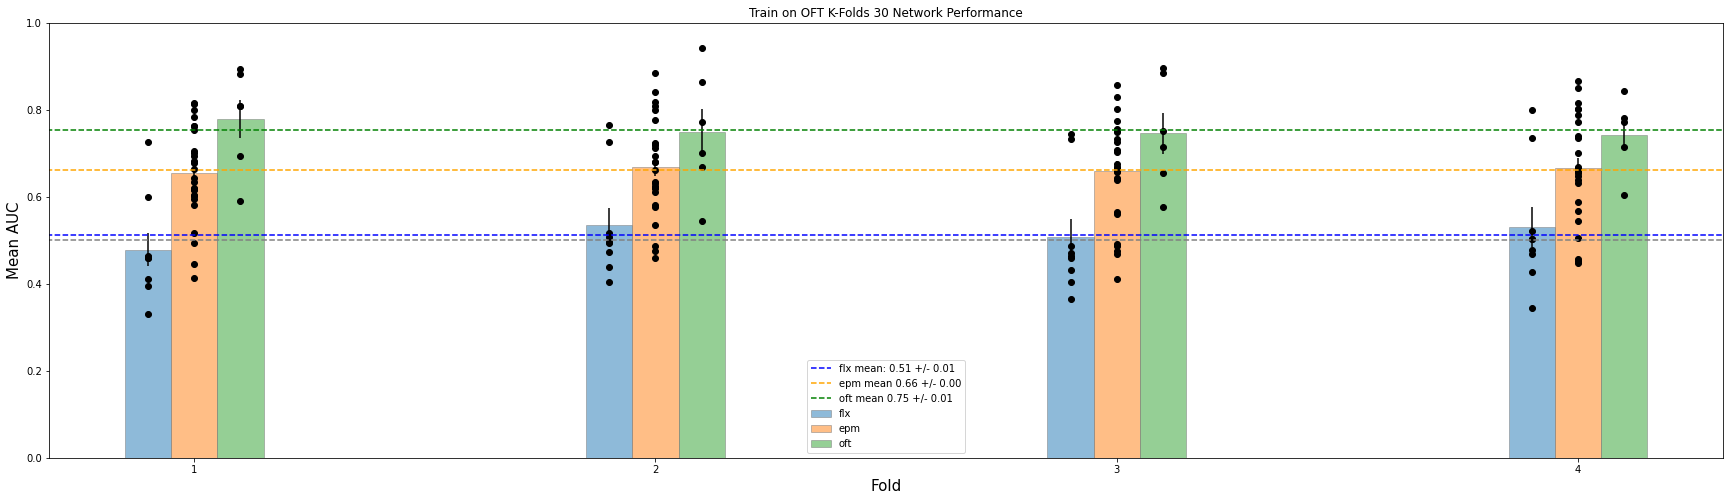

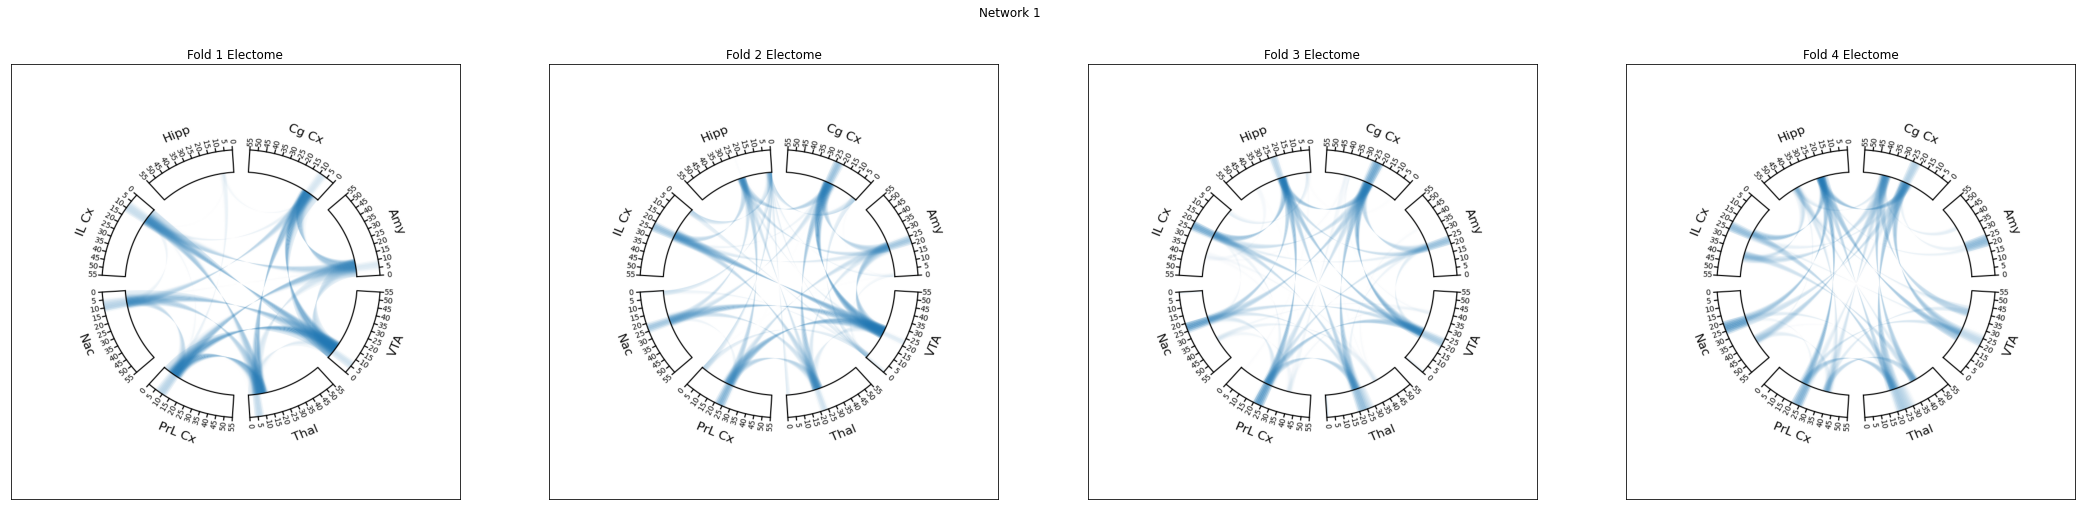

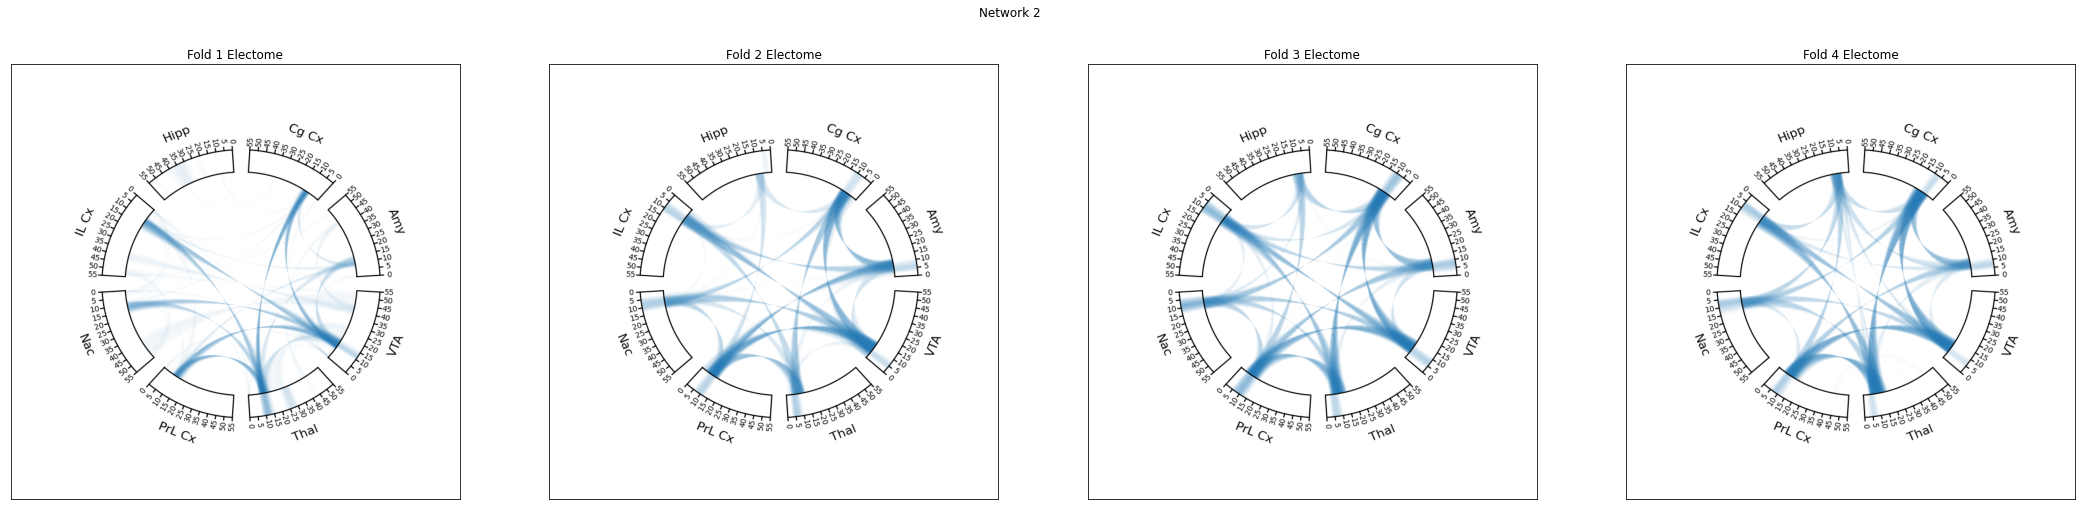

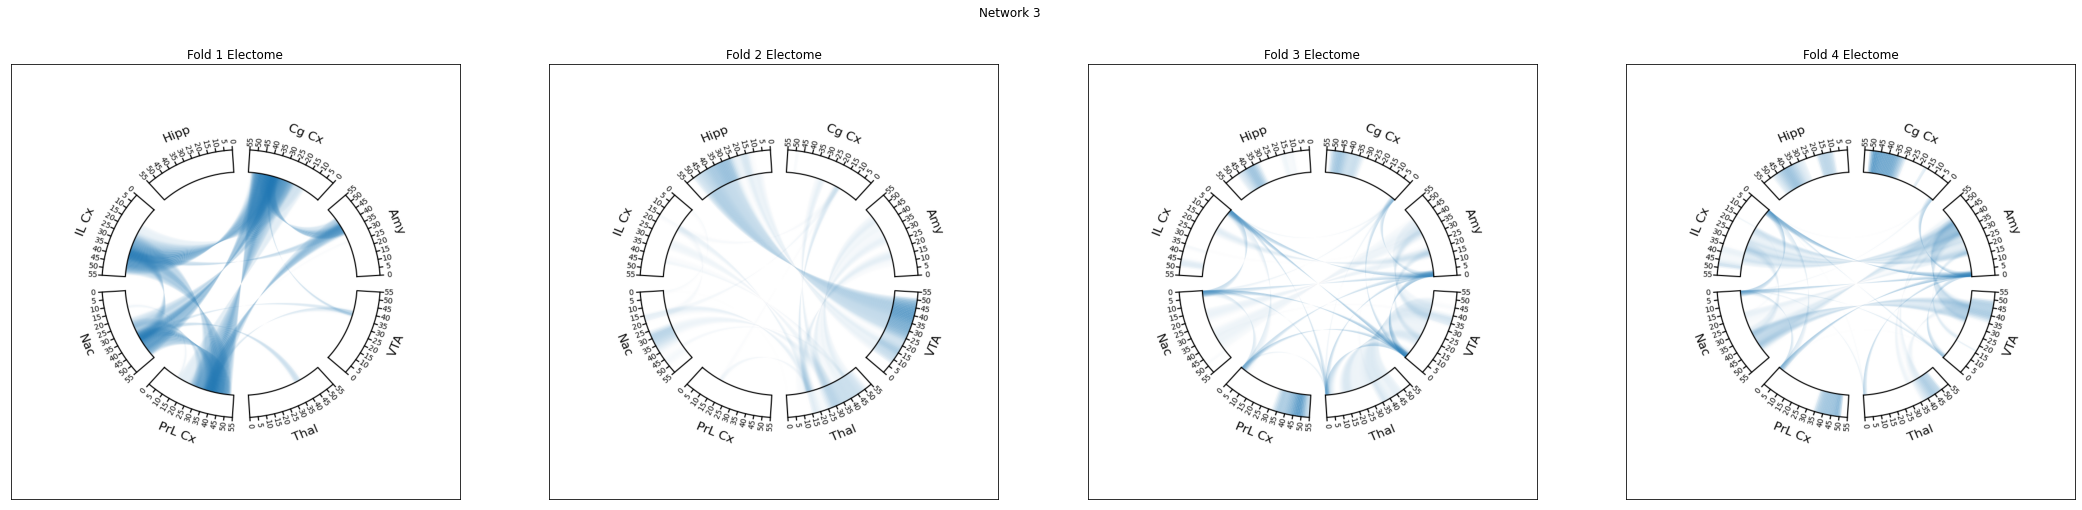

In [21]:
barWidth = 0.1
fig = plt.subplots(figsize=(30,8))

br1 = np.arange(len(flx_auc_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, flx_auc_list,yerr=flx_sterr_list, width = barWidth,
        edgecolor ='grey', label ='flx',alpha=0.5)
plt.bar(br2, epm_auc_list,yerr=epm_sterr_list, width = barWidth,
        edgecolor ='grey', label ='epm',alpha=0.5)
plt.bar(br3, oft_auc_list,yerr=oft_sterr_list, width = barWidth,
        edgecolor ='grey', label ='oft',alpha=0.5)

for fold in range(len(fold_list)):
    plt.scatter(np.ones(len(flx_points_list[fold]))*br1[fold],flx_points_list[fold],color="black")
    plt.scatter(np.ones(len(epm_points_list[fold]))*br2[fold],epm_points_list[fold],color="black")
    plt.scatter(np.ones(len(oft_points_list[fold]))*br3[fold],oft_points_list[fold],color="black")

# Adding Xticks
plt.axhline(0.5,-1,6,linestyle="dashed",color="grey")
plt.axhline(np.mean(flx_auc_list),-1,6,linestyle="dashed",color="blue",label="flx mean: {:.2f} +/- {:.2f}".format(np.mean(flx_auc_list),np.std(flx_auc_list)/np.sqrt(len(flx_auc_list))))
plt.axhline(np.mean(epm_auc_list),-1,6,linestyle="dashed",color="orange",label="epm mean {:.2f} +/- {:.2f}".format(np.mean(epm_auc_list),np.std(epm_auc_list)/np.sqrt(len(epm_auc_list))))
plt.axhline(np.mean(oft_auc_list),-1,6,linestyle="dashed",color="green",label="oft mean {:.2f} +/- {:.2f}".format(np.mean(oft_auc_list),np.std(oft_auc_list)/np.sqrt(len(oft_auc_list))))
plt.xlabel('Fold', fontsize = 15)
plt.ylabel('Mean AUC', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(flx_auc_list))],
        fold_list)
plt.ylim([0,1])
plt.legend(prop={'size':10})
plt.title("Train on OFT K-Folds 30 Network Performance")
plt.savefig("/hpc/home/mk423/Anxiety/FullDataWork/Figures/SingleTask/OFT_K_Folds_Prediction.png")
plt.show()

for net in [1,2,3]:
    plt.figure(figsize=(37,8))
    
    for i,fold in enumerate(fold_list):
        plt.subplot(1,4,i+1)
        im = image.imread(epm_plots_file.format(net,fold))
        plt.imshow(im,aspect="auto")
        plt.title("Fold {} Electome".format(fold))
        plt.xticks([])
        plt.yticks([])
    plt.suptitle("Network {}".format(net))
    plt.show()

## FLX

In [22]:
flx_results_file = results_path + "flx_singleTask_30_net_fold_{}_results.pkl"
flx_plots_file = plots_path + "flx_singleTask_{}_net_fold_{}_electome.png"

fold_list = [1,2,3,4]

flx_auc_list = []
epm_auc_list = []
oft_auc_list = []

flx_sterr_list = []
epm_sterr_list = []
oft_sterr_list = []

flx_points_list = []
epm_points_list = []
oft_points_list = []

flx_mouse_list = []
epm_mouse_list = []
oft_mouse_list = []
for fold in fold_list:
    
    resultsDict = pickle.load(open(flx_results_file.format(fold),"rb"))
    print("Fold ",fold)
    
    flx_val_auc_dict = resultsDict['flx_val_auc']
    flx_train_auc_dict = resultsDict['flx_train_auc']
    flx_auc_dict = flx_val_auc_dict
    
    flx_mean, flx_sterr, flx_n = mean_sterr_auc(flx_auc_dict)
    print("FLX (mean, stderr, n)",flx_mean, flx_sterr, flx_n)
    flx_auc_list.append(flx_mean)
    flx_sterr_list.append(flx_sterr)
    flx_points_list.append([flx_auc_dict[key] for key in flx_auc_dict.keys()])
    flx_mouse_list.append([key for key in flx_auc_dict.keys()])

    epm_val_auc_dict = resultsDict['epm_val_auc']
    epm_train_auc_dict = resultsDict['epm_train_auc']
    epm_val_auc_dict.update(epm_train_auc_dict)
    epm_auc_dict = epm_val_auc_dict
    
    epm_mean, epm_sterr, epm_n = mean_sterr_auc(epm_auc_dict)
    print("EPM (mean, stderr, n)",epm_mean, epm_sterr, epm_n)
    epm_auc_list.append(epm_mean)
    epm_sterr_list.append(epm_sterr)
    epm_points_list.append([epm_auc_dict[key] for key in epm_auc_dict.keys()])
    epm_mouse_list.append([key for key in epm_auc_dict.keys()])

    oft_val_auc_dict = resultsDict['oft_val_auc']
    oft_train_auc_dict = resultsDict['oft_train_auc']
    oft_val_auc_dict.update(oft_train_auc_dict)
    oft_auc_dict = oft_val_auc_dict
    
    oft_mean, oft_sterr, oft_n = mean_sterr_auc(oft_auc_dict)
    print("OFT (mean, stderr, n)",oft_mean, oft_sterr, oft_n)
    oft_auc_list.append(oft_mean)
    oft_sterr_list.append(oft_sterr)
    oft_points_list.append([oft_auc_dict[key] for key in oft_auc_dict.keys()])
    oft_mouse_list.append([key for key in oft_auc_dict.keys()])


Fold  1
FLX (mean, stderr, n) 0.7052612791052097 0.01932259625227642 3
EPM (mean, stderr, n) 0.4839577422370032 0.010818665885785207 26
OFT (mean, stderr, n) 0.40501743330285817 0.021913074202648077 15
Fold  2
FLX (mean, stderr, n) 0.681383886261576 0.018453295785113916 3
EPM (mean, stderr, n) 0.4995214382337829 0.011006876292186383 26
OFT (mean, stderr, n) 0.4712871472961267 0.02131651468074113 15
Fold  3
FLX (mean, stderr, n) 0.6495313563885959 0.025838191724111913 3
EPM (mean, stderr, n) 0.5016875516622972 0.011331512201619126 26
OFT (mean, stderr, n) 0.4517165877896226 0.021750496734348628 15
Fold  4
FLX (mean, stderr, n) 0.6834020403064889 0.01274657125254136 3
EPM (mean, stderr, n) 0.4702535189091664 0.010480575837185419 26
OFT (mean, stderr, n) 0.41993428615773726 0.01977840771136391 15


In [23]:
test_df_list = []
for fold in range(4):
    oft_auc = np.array(oft_points_list[fold]).squeeze()
    oft_mice = np.array(oft_mouse_list[fold]).squeeze()
    
    flx_auc = np.array(flx_points_list[fold]).squeeze()
    flx_mice = np.array(flx_mouse_list[fold]).squeeze()
    
    epm_auc = np.array(epm_points_list[fold]).squeeze()
    epm_mice = np.array(epm_mouse_list[fold]).squeeze()
    
    temp_oft = pd.DataFrame({"oft-mouse-fold-{}".format(fold):oft_mice,"oft-auc-fold-{}".format(fold):oft_auc})
    temp_flx = pd.DataFrame({"flx-mouse-fold-{}".format(fold):flx_mice,"flx-auc-fold-{}".format(fold):flx_auc})
    temp_epm = pd.DataFrame({"epm-mouse-fold-{}".format(fold):epm_mice,"epm-auc-fold-{}".format(fold):epm_auc})
    
    df_con =  pd.concat([temp_flx,temp_epm,temp_oft],axis=1)
    
    test_df_list.append(df_con)
    
test_df = pd.concat(test_df_list,axis=1,join="inner")
test_df.to_csv("FLX_SingleTask_kf_results.csv")
test_df.head()

,flx-mouse-fold-0,flx-auc-fold-0,epm-mouse-fold-0,epm-auc-fold-0,oft-mouse-fold-0,oft-auc-fold-0,flx-mouse-fold-1,flx-auc-fold-1,epm-mouse-fold-1,epm-auc-fold-1,...,epm-mouse-fold-2,epm-auc-fold-2,oft-mouse-fold-2,oft-auc-fold-2,flx-mouse-fold-3,flx-auc-fold-3,epm-mouse-fold-3,epm-auc-fold-3,oft-mouse-fold-3,oft-auc-fold-3
0,Mouse3191,0.673779,Mouse04193,0.437633,Mouse04193,0.414352,Mouse3191,0.636560,Mouse04205,0.546914,...,Mouse39125,0.472459,Mouse3191,0.417277,Mouse3191,0.652216,Mouse69065,0.515989,Mouse04191,0.301811
1,Mouse3193,0.751609,Mouse04201,0.418256,Mouse04201,0.355602,Mouse3193,0.698747,Mouse0643,0.429813,...,Mouse39133,0.518294,Mouse3193,0.367733,Mouse3193,0.700298,Mouse69074,0.457305,Mouse3191,0.368371
2,Mouse61631,0.690395,Mouse04202,0.577612,Mouse04202,0.464618,Mouse61635,0.708845,Mouse1551,0.475554,...,Mouse6293,0.504505,Mouse39125,0.344748,Mouse78752,0.697692,Mouse8582,0.466270,Mouse3193,0.339950
3,NaN,NaN,Mouse0630,0.455751,Mouse3191,0.379063,NaN,NaN,Mouse39114,0.558105,...,Mouse69064,0.553371,Mouse39133,0.321242,NaN,NaN,Mouse8891,0.610799,Mouse69065,0.418779
4,NaN,NaN,Mouse0633,0.459407,Mouse3193,0.288791,NaN,NaN,Mouse39124,0.476163,...,Mouse8580,0.465735,Mouse69064,0.521580,NaN,NaN,Mouse8894,0.450408,Mouse69074,0.437929


In [59]:
test_df

,flx-mouse-fold-0,flx-auc-fold-0,epm-mouse-fold-0,epm-auc-fold-0,oft-mouse-fold-0,oft-auc-fold-0,flx-mouse-fold-1,flx-auc-fold-1,epm-mouse-fold-1,epm-auc-fold-1,...,epm-mouse-fold-2,epm-auc-fold-2,oft-mouse-fold-2,oft-auc-fold-2,flx-mouse-fold-3,flx-auc-fold-3,epm-mouse-fold-3,epm-auc-fold-3,oft-mouse-fold-3,oft-auc-fold-3
0,Mouse3191,0.673779,Mouse04193,0.437633,Mouse04193,0.414352,Mouse3191,0.636560,Mouse04205,0.546914,...,Mouse39125,0.472459,Mouse3191,0.417277,Mouse3191,0.652216,Mouse69065,0.515989,Mouse04191,0.301811
1,Mouse3193,0.751609,Mouse04201,0.418256,Mouse04201,0.355602,Mouse3193,0.698747,Mouse0643,0.429813,...,Mouse39133,0.518294,Mouse3193,0.367733,Mouse3193,0.700298,Mouse69074,0.457305,Mouse3191,0.368371
2,Mouse61631,0.690395,Mouse04202,0.577612,Mouse04202,0.464618,Mouse61635,0.708845,Mouse1551,0.475554,...,Mouse6293,0.504505,Mouse39125,0.344748,Mouse78752,0.697692,Mouse8582,0.466270,Mouse3193,0.339950
3,NaN,NaN,Mouse0630,0.455751,Mouse3191,0.379063,NaN,NaN,Mouse39114,0.558105,...,Mouse69064,0.553371,Mouse39133,0.321242,NaN,NaN,Mouse8891,0.610799,Mouse69065,0.418779
4,NaN,NaN,Mouse0633,0.459407,Mouse3193,0.288791,NaN,NaN,Mouse39124,0.476163,...,Mouse8580,0.465735,Mouse69064,0.521580,NaN,NaN,Mouse8894,0.450408,Mouse69074,0.437929
5,NaN,NaN,Mouse0634,0.419099,Mouse69072,0.553499,NaN,NaN,Mouse6291,0.454182,...,Mouse8581,0.495238,Mouse69072,0.548873,NaN,NaN,Mouse04193,0.427098,Mouse04193,0.535156
6,NaN,NaN,Mouse0642,0.464560,Mouse04191,0.327391,NaN,NaN,Mouse6292,0.581935,...,Mouse04193,0.496999,Mouse04191,0.362120,NaN,NaN,Mouse04201,0.456387,Mouse04201,0.369599
7,NaN,NaN,Mouse04205,0.518519,Mouse04205,0.446163,NaN,NaN,Mouse04193,0.503554,...,Mouse04201,0.493955,Mouse04193,0.578067,NaN,NaN,Mouse04202,0.567942,Mouse04202,0.467534
8,NaN,NaN,Mouse04215,0.485777,Mouse04215,NaN,NaN,NaN,Mouse04201,0.522980,...,Mouse04202,0.632479,Mouse04201,0.401448,NaN,NaN,Mouse04205,0.424691,Mouse04205,0.474048
9,NaN,NaN,Mouse0643,0.429677,Mouse3192,NaN,NaN,NaN,Mouse04202,0.627983,...,Mouse04205,0.506173,Mouse04202,0.582896,NaN,NaN,Mouse04215,0.459796,Mouse04215,NaN


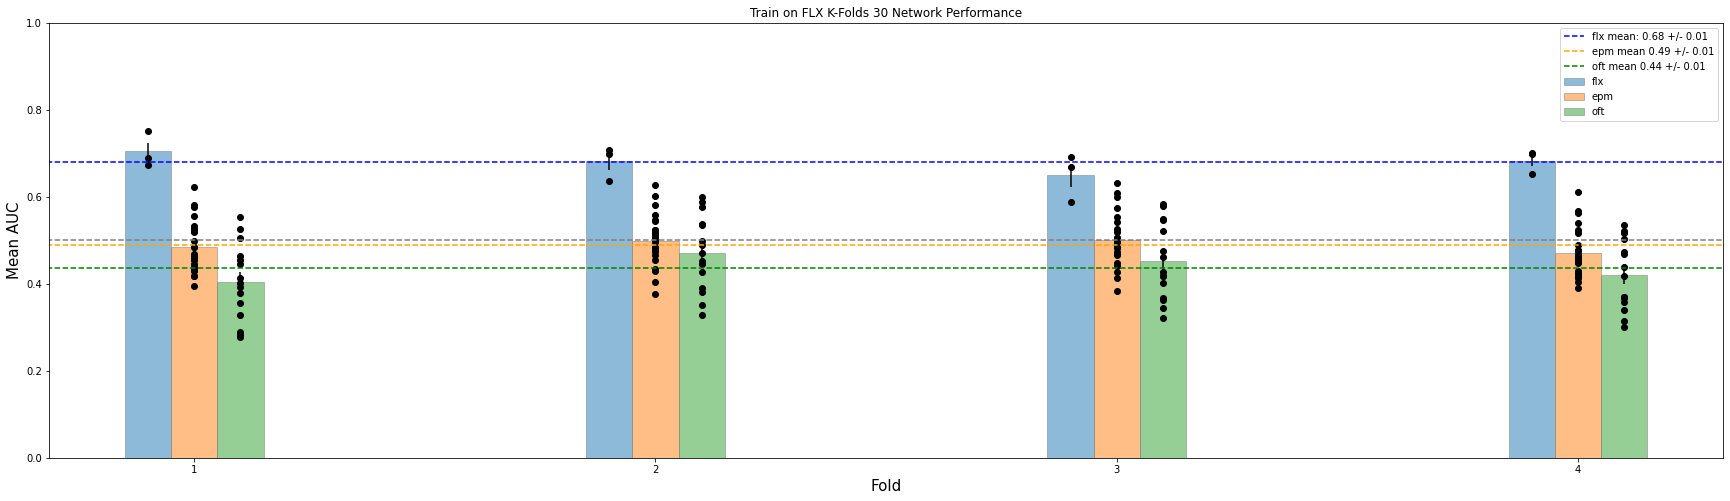

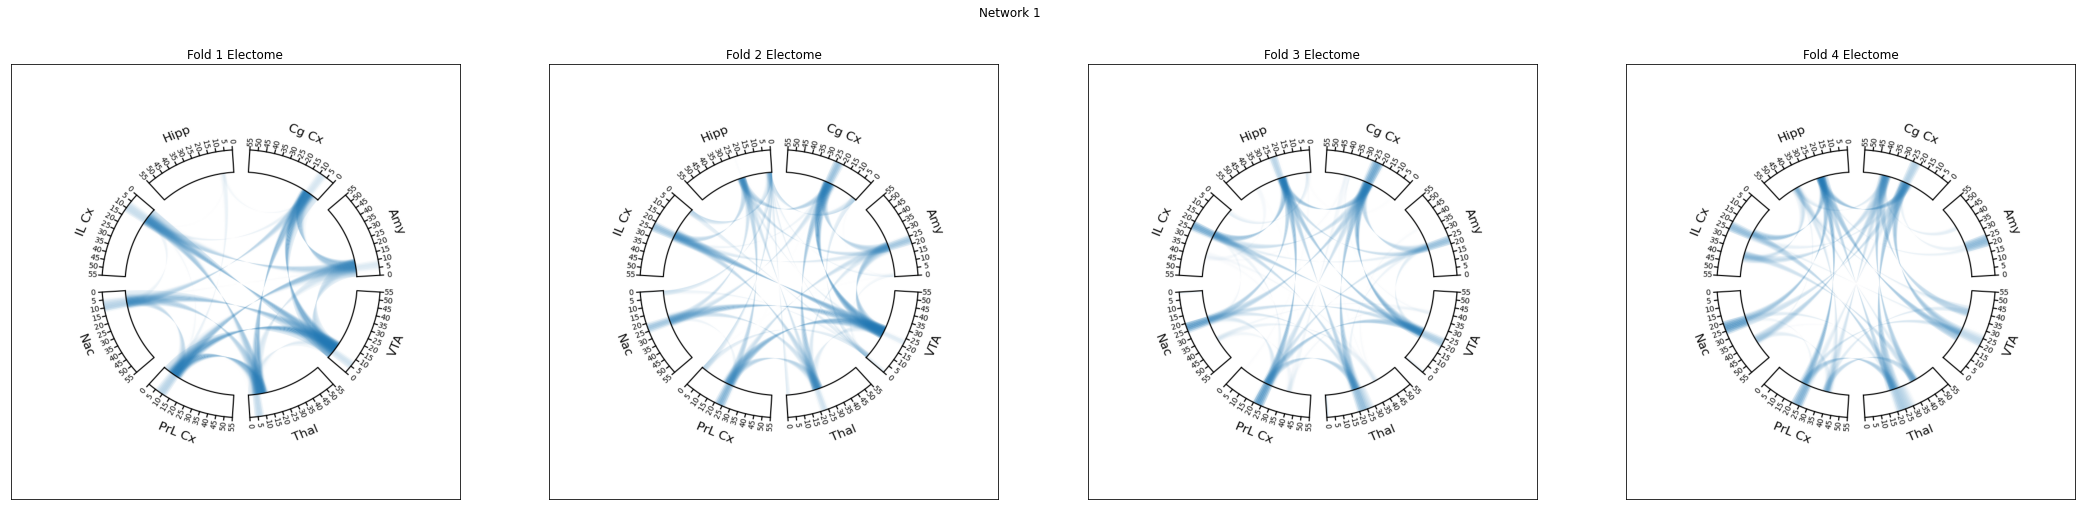

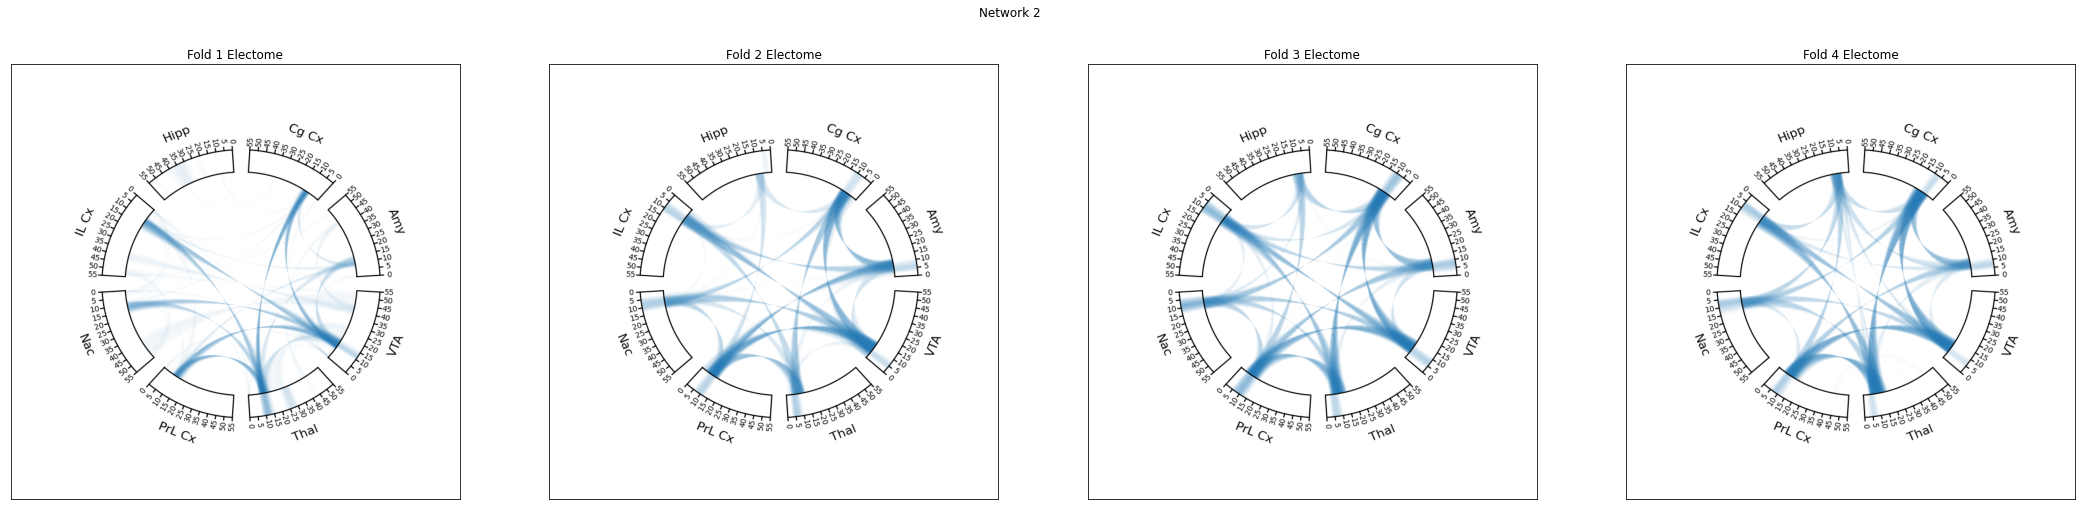

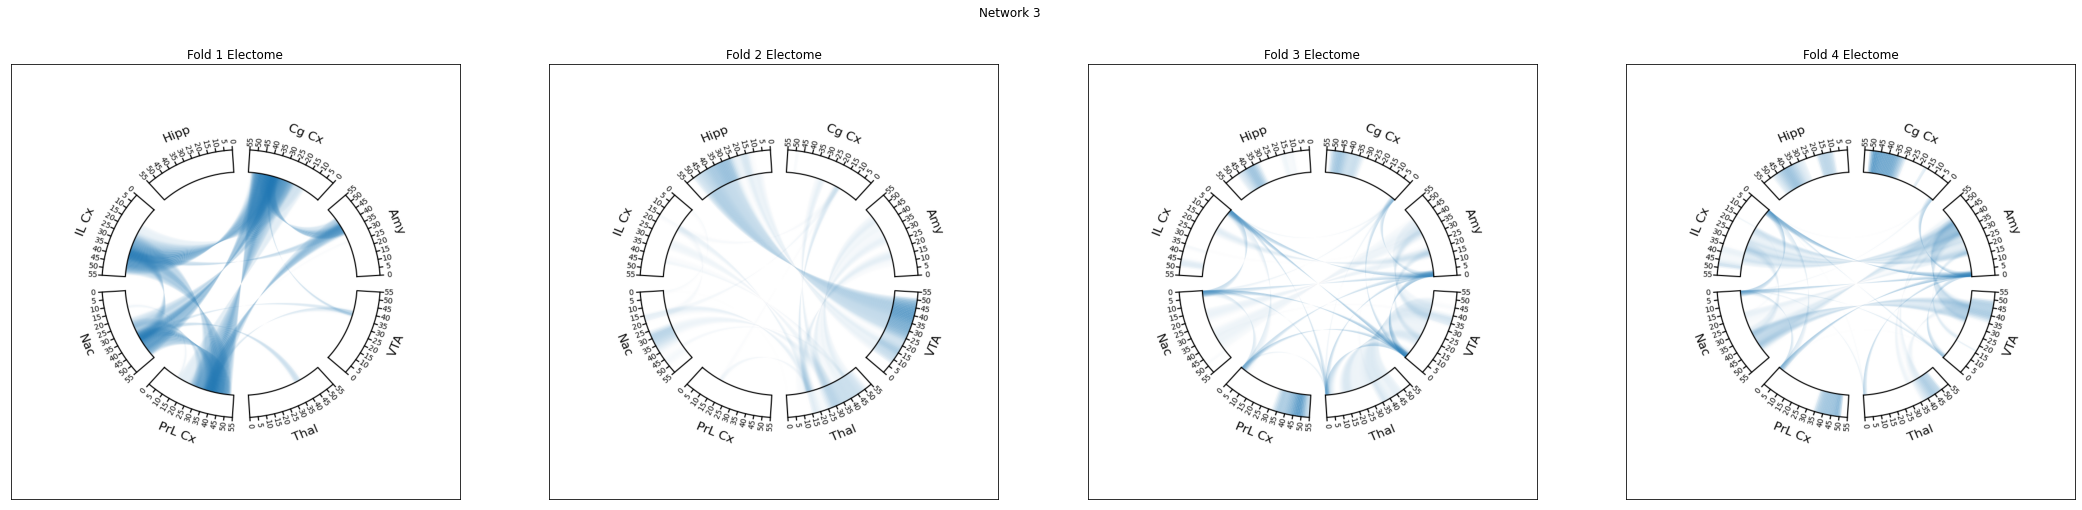

In [9]:
barWidth = 0.1
fig = plt.subplots(figsize=(30,8))

br1 = np.arange(len(flx_auc_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, flx_auc_list,yerr=flx_sterr_list, width = barWidth,
        edgecolor ='grey', label ='flx',alpha=0.5)
plt.bar(br2, epm_auc_list,yerr=epm_sterr_list, width = barWidth,
        edgecolor ='grey', label ='epm',alpha=0.5)
plt.bar(br3, oft_auc_list,yerr=oft_sterr_list, width = barWidth,
        edgecolor ='grey', label ='oft',alpha=0.5)

for fold in range(len(fold_list)):
    plt.scatter(np.ones(len(flx_points_list[fold]))*br1[fold],flx_points_list[fold],color="black")
    plt.scatter(np.ones(len(epm_points_list[fold]))*br2[fold],epm_points_list[fold],color="black")
    plt.scatter(np.ones(len(oft_points_list[fold]))*br3[fold],oft_points_list[fold],color="black")

# Adding Xticks
plt.axhline(0.5,-1,6,linestyle="dashed",color="grey")
plt.axhline(np.mean(flx_auc_list),-1,6,linestyle="dashed",color="blue",label="flx mean: {:.2f} +/- {:.2f}".format(np.mean(flx_auc_list),np.std(flx_auc_list)/np.sqrt(len(flx_auc_list))))
plt.axhline(np.mean(epm_auc_list),-1,6,linestyle="dashed",color="orange",label="epm mean {:.2f} +/- {:.2f}".format(np.mean(epm_auc_list),np.std(epm_auc_list)/np.sqrt(len(epm_auc_list))))
plt.axhline(np.mean(oft_auc_list),-1,6,linestyle="dashed",color="green",label="oft mean {:.2f} +/- {:.2f}".format(np.mean(oft_auc_list),np.std(oft_auc_list)/np.sqrt(len(oft_auc_list))))
plt.xlabel('Fold', fontsize = 15)
plt.ylabel('Mean AUC', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(flx_auc_list))],
        fold_list)
plt.ylim([0,1])
plt.legend(prop={'size':10})
plt.title("Train on FLX K-Folds 30 Network Performance")
plt.savefig("/hpc/home/mk423/Anxiety/FullDataWork/Figures/SingleTask/FLX_K_Folds_Prediction.png")
plt.show()

for net in [1,2,3]:
    plt.figure(figsize=(37,8))
    
    for i,fold in enumerate(fold_list):
        plt.subplot(1,4,i+1)
        im = image.imread(epm_plots_file.format(net,fold))
        plt.imshow(im,aspect="auto")
        plt.title("Fold {} Electome".format(fold))
        plt.xticks([])
        plt.yticks([])
    plt.suptitle("Network {}".format(net))
    plt.show()